In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

class LinearRegression:
  # initiating the parameters(learning rate & no of iteration)
    def __init__(self,learning_rate,no_of_iteration):
      self.learning_rate = learning_rate
      self.no_of_iteration = no_of_iteration

    def fit(self,X,Y):
      # number of training example & number of feature
      self.m, self.n= X.shape # no of rows & column
      #initiating weight & bias
      self.w = np.zeros(self.n)
      self.b = 0
      self.X = X
      self.Y = Y

      #implementing Gradient Descent
      for i in range(self.no_of_iteration):
        self.update_weights(self.Y)


    def update_weights(self,Y ):
      Y_prediction = self.predict(self.X)

      # Calculate the Gradient Descent
      dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
      db = - 2 * np.sum(self.Y - Y_prediction) / self.m

      # Updating the Weights
      self.w= self.w - self.learning_rate * dw
      self.b = self.b - self.learning_rate * db


    def predict(self,X):
      return X.dot(self.w) + self.b


In [3]:
ds = pd.read_csv('/content/apple_stock_price.csv')

In [4]:
ds.shape

(10987, 6)

In [5]:
ds.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [6]:
ds.tail(10)

,Date,Open,High,Low,Close,Volume
10977,01-07-2024,212.089996,217.509995,211.919998,216.750000,60402900
10978,02-07-2024,216.149994,220.380005,215.100006,220.270004,58046200
10979,03-07-2024,220.000000,221.550003,219.029999,221.550003,37369800
10980,05-07-2024,221.649994,226.449997,221.649994,226.339996,60412400
10981,08-07-2024,227.089996,227.850006,223.250000,227.820007,59085900
10982,09-07-2024,227.929993,229.399994,226.369995,228.679993,48076100
10983,10-07-2024,229.300003,233.080002,229.250000,232.979996,62627700
10984,11-07-2024,231.389999,232.389999,225.770004,227.570007,64710600
10985,12-07-2024,228.919998,232.639999,228.679993,230.539993,53008200
10986,15-07-2024,236.531998,237.229996,233.089996,234.399994,58409071


Tell pandas the correct form of dates

In [7]:
# ds['Date']=pd.to_datetime(ds['Date'], format='%Y-%m-%d')


In [8]:
ds['Date']=pd.to_datetime(ds['Date'], format='%d-%m-%Y')

In [9]:
ds['year']= pd.DatetimeIndex(ds['Date']).year
ds['month']= pd.DatetimeIndex(ds['Date']).month
ds['day']= pd.DatetimeIndex(ds['Date']).day
ds['dayofweek']= pd.DatetimeIndex(ds['Date']).dayofweek

In [10]:
ds.round(2)

,Date,Open,High,Low,Close,Volume,year,month,day,dayofweek
0,1980-12-12,0.10,0.10,0.10,0.10,469033600,1980,12,12,4
1,1980-12-15,0.09,0.09,0.09,0.09,175884800,1980,12,15,0
2,1980-12-16,0.09,0.09,0.09,0.09,105728000,1980,12,16,1
3,1980-12-17,0.09,0.09,0.09,0.09,86441600,1980,12,17,2
4,1980-12-18,0.09,0.09,0.09,0.09,73449600,1980,12,18,3
...,...,...,...,...,...,...,...,...,...,...
10982,2024-07-09,227.93,229.40,226.37,228.68,48076100,2024,7,9,1
10983,2024-07-10,229.30,233.08,229.25,232.98,62627700,2024,7,10,2
10984,2024-07-11,231.39,232.39,225.77,227.57,64710600,2024,7,11,3
10985,2024-07-12,228.92,232.64,228.68,230.54,53008200,2024,7,12,4


In [11]:
ds.describe()

,Date,Open,High,Low,Close,Volume,year,month,day,dayofweek
count,10987,10987.000000,10987.000000,10987.000000,10987.000000,1.098700e+04,10987.000000,10987.000000,10987.000000,10987.000000
mean,2002-09-18 14:44:01.594611712,21.302671,21.532961,21.083972,21.317731,3.183499e+08,2002.216256,6.510876,15.734322,2.018203
min,1980-12-12 00:00:00,0.038331,0.038331,0.037900,0.037900,0.000000e+00,1980.000000,1.000000,1.000000,0.000000
25%,1991-10-23 12:00:00,0.241839,0.246853,0.237279,0.242029,1.133830e+08,1991.000000,4.000000,8.000000,1.000000
50%,2002-09-16 00:00:00,0.430761,0.437763,0.422418,0.429639,2.059652e+08,2002.000000,7.000000,16.000000,2.000000
75%,2013-08-13 12:00:00,17.249799,17.383506,17.076788,17.230839,3.986920e+08,2013.000000,10.000000,23.000000,3.000000
max,2024-07-15 00:00:00,236.531998,237.229996,233.089996,234.399994,7.421641e+09,2024.000000,12.000000,31.000000,4.000000
std,NaN,45.148670,45.636083,44.700569,45.189553,3.355121e+08,12.587130,3.432974,8.747305,1.400384


In [12]:
ds.head()

,Date,Open,High,Low,Close,Volume,year,month,day,dayofweek
0,1980-12-12,0.099058,0.099488,0.099058,0.099058,469033600,1980,12,12,4
1,1980-12-15,0.094321,0.094321,0.093890,0.093890,175884800,1980,12,15,0
2,1980-12-16,0.087429,0.087429,0.086999,0.086999,105728000,1980,12,16,1
3,1980-12-17,0.089152,0.089582,0.089152,0.089152,86441600,1980,12,17,2
4,1980-12-18,0.091737,0.092167,0.091737,0.091737,73449600,1980,12,18,3


Analysis the data by graph representation

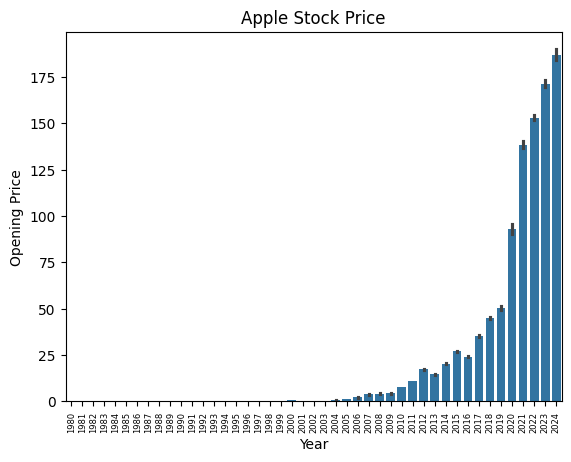

In [13]:
sns.barplot(x='year',y= 'Open',data=ds).set(title='Apple Stock Price')
# xlabel('Year')
# ylabel('Opening Price')
plt.xlabel('Year')
plt.ylabel('Opening Price')
plt.xticks(rotation='vertical',size=6)
plt.show()

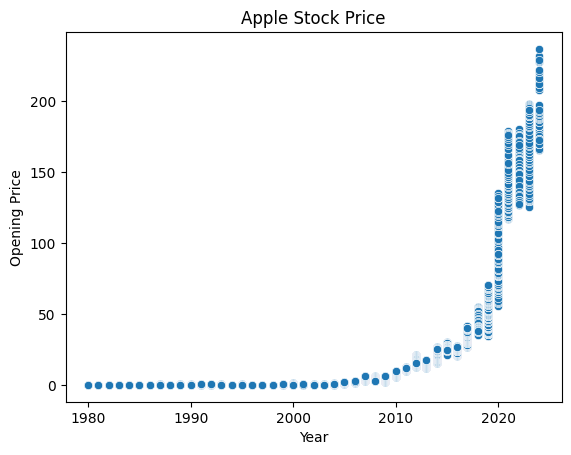

In [14]:
sns.scatterplot(x='year',y='Open',data=ds)
plt.title('Apple Stock Price')
plt.xlabel('Year')
plt.ylabel('Opening Price')
plt.show()

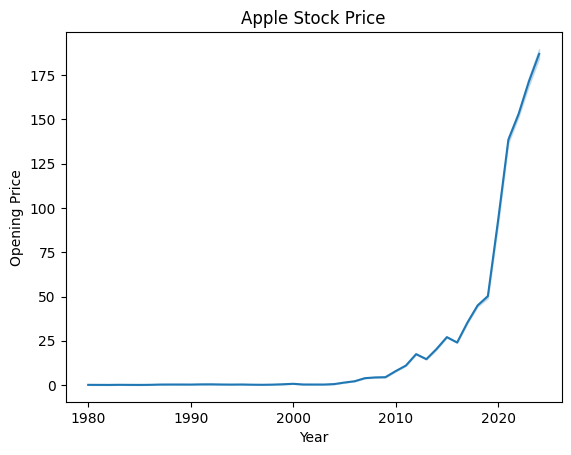

In [15]:
sns.lineplot(x='year',y='Open',data=ds)
plt.title('Apple Stock Price')
plt.ylabel('Opening Price')
plt.xlabel('Year')
plt.show()

Now analyse Volume of apple stock

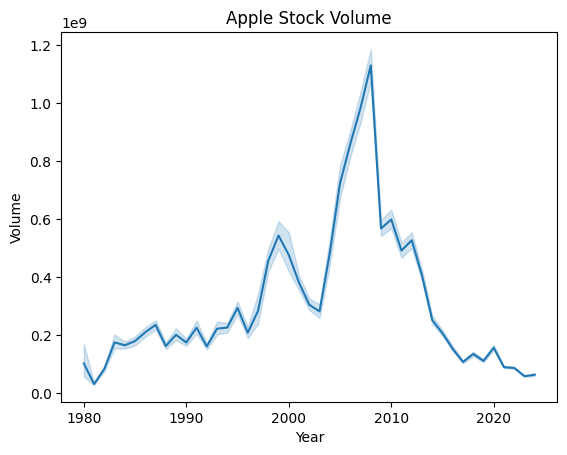

In [16]:
sns.lineplot(x='year',y='Volume',data=ds)
plt.title('Apple Stock Volume')
plt.ylabel('Volume')
plt.xlabel('Year')
plt.show()

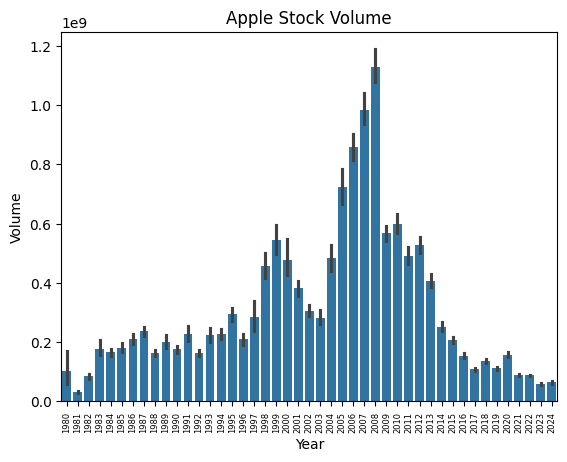

In [17]:
sns.barplot(x='year',y='Volume',data=ds)
plt.title('Apple Stock Volume')
plt.ylabel('Volume')
plt.xlabel('Year')
plt.xticks(rotation='vertical',size=6)
plt.show()

In [18]:
# import test train library
from sklearn.model_selection import train_test_split

In [19]:
# splitting the features and target
X = ds['Date']
Y = ds['Close']

In [20]:
print(X)
print(Y)

0       1980-12-12
1       1980-12-15
2       1980-12-16
3       1980-12-17
4       1980-12-18
           ...    
10982   2024-07-09
10983   2024-07-10
10984   2024-07-11
10985   2024-07-12
10986   2024-07-15
Name: Date, Length: 10987, dtype: datetime64[ns]
0          0.099058
1          0.093890
2          0.086999
3          0.089152
4          0.091737
            ...    
10982    228.679993
10983    232.979996
10984    227.570007
10985    230.539993
10986    234.399994
Name: Close, Length: 10987, dtype: float64


In [21]:
# Splitting data into test and training
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)


In [22]:
model = LinearRegression(learning_rate=0.02,no_of_iteration=1000)

In [23]:
model.fit(X_train,Y_train)

ValueError: not enough values to unpack (expected 2, got 1)

Predict the value on test data

In [ ]:
test_data_prediction = model.predict(X_test)

In [ ]:
print(test_data_prediction)

Visualise the predicted value

In [ ]:
Y.shape


In [ ]:
# plt.scatter(X_test,Y_test,color='red')
plt.plot(Y_test,test_data_prediction ,color = 'blue')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()